In [5]:
from zipfile import ZipFile
file_name = "/content/archive (3).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [6]:
import numpy as np
import cv2
# Import TensorFlow if you are using TensorFlow 2.x with Keras
import tensorflow as tf

# Use tf.keras instead of keras if using TensorFlow 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
# Import ImageDataGenerator from tf.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model with the updated optimizer parameters
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    metrics=['accuracy']
)

# Continue training the model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.2428 - loss: 1.8293 - val_accuracy: 0.3153 - val_loss: 1.7232
Epoch 2/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 168us/step - accuracy: 0.2969 - loss: 1.7443 - val_accuracy: 0.4000 - val_loss: 1.4846
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 458s 1s/step - accuracy: 0.3477 - loss: 1.6612 - val_accuracy: 0.4050 - val_loss: 1.5493
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 138us/step - accuracy: 0.3594 - loss: 1.6080 - val_accuracy: 0.4000 - val_loss: 1.6068
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.4046 - loss: 1.5421 - val_accuracy: 0.4357 - val_loss: 1.4708
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 146us/step - accuracy: 0.3594 - loss: 1.5244 - val_accuracy: 0.5000 - val_loss: 1.3173
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.4364 - loss: 1.4678 - val_accuracy: 0.4630 - val_loss: 1.4179
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.5000 - loss: 1.2780 - val_accuracy: 0.4000 - val_loss: 1.5459
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 490s 1s/step - accuracy: 0.4588 - loss: 1.4108 - val_accuracy: 0.4812 - val_loss: 1.3561
Epoch 10/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 132us/step - accuracy: 0.3750 - loss: 1.5372 - val_accuracy: 

In [10]:
#Saving the model
emotion_model.save('model.h5')

In [11]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [12]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [15]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

OpenCV(4.10.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


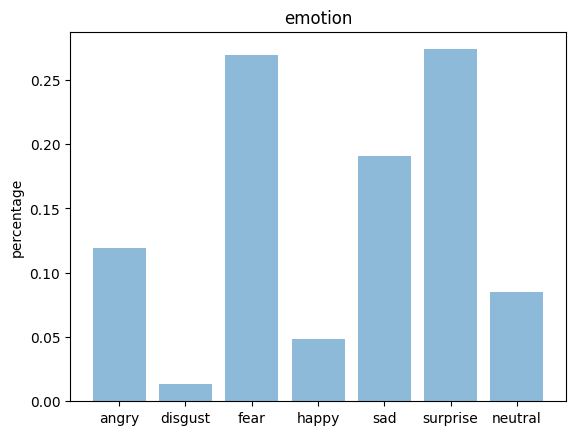

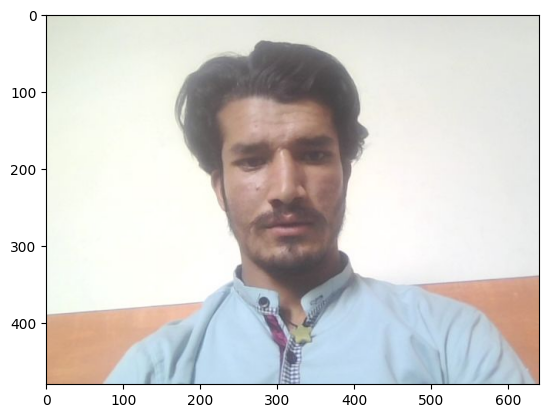

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory

def facecrop(image_path):
    facedata = '/content/haarcascade_frontalface_alt.xml'  # Ensure this file path is correct
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image_path)

    try:
        minisize = (img.shape[1], img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [v for v in f]
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            sub_face = img[y:y+h, x:x+w]

            cv2.imwrite('capture.jpg', sub_face)
            # print ("Writing: " + image)

    except Exception as e:
        print(e)

if __name__ == '__main__':
    facecrop('photo.jpg')

# Testing the file

file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48])

plt.imshow(true_image)
plt.show()


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Step 1: Get the ground truth and predictions for validation set
validation_generator.reset()  # Ensure no shuffling for evaluation
Y_pred = emotion_model.predict(validation_generator, validation_generator.samples // 64)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Step 2: Classification Report
print('Classification Report')
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(classification_report(y_true, y_pred, target_names=target_names))


113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 275ms/step
Classification Report
              precision    recall  f1-score   support

       Angry       0.13      0.15      0.14       958
     Disgust       0.00      0.00      0.00       111
        Fear       0.15      0.08      0.10      1024
       Happy       0.23      0.26      0.24      1774
         Sad       0.17      0.20      0.18      1233
    Surprise       0.19      0.18      0.18      1247
     Neutral       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



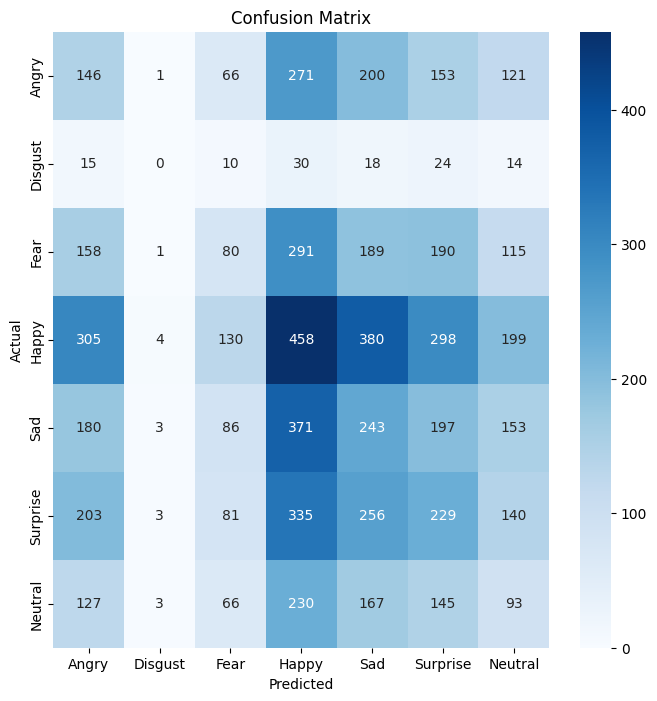

In [21]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# Step 4: Evaluate the model on the test data (validation set)
loss, accuracy = emotion_model.evaluate(validation_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 256ms/step - accuracy: 0.5520 - loss: 1.1961
Test Loss: 1.1973234415054321
Test Accuracy: 0.5470883250236511


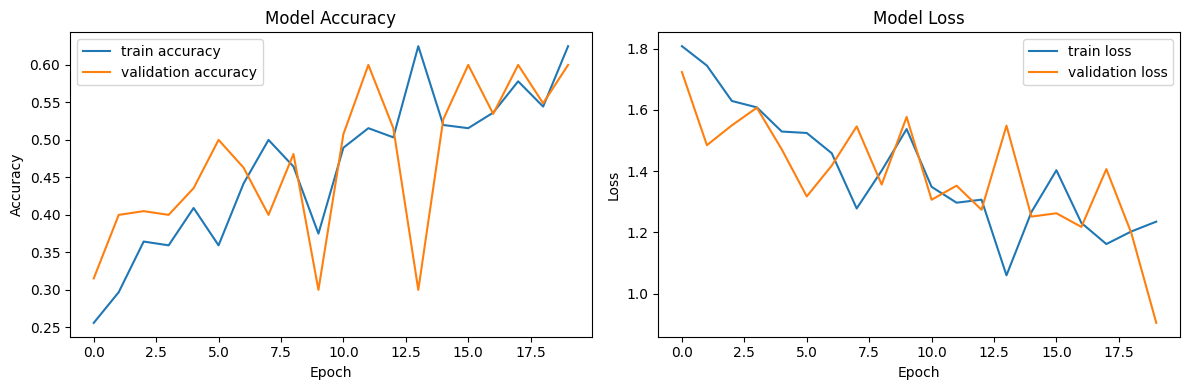

In [23]:
# Step 5: Plotting the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(emotion_model_info.history['accuracy'], label='train accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(emotion_model_info.history['loss'], label='train loss')
plt.plot(emotion_model_info.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
